In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Условие 1: Задача 1

### 1.1. Скачать следующие данные: kc-house-data

In [3]:
df = pd.read_csv('./kc-house-data.csv')
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21176,3876900089,20150430T000000,687015.0,3,1.75,1470,873,3.0,0,0,...,10,1470,0,2009,0,98119,47.6256,-122.362,1410,967
16365,4338800500,20141014T000000,262500.0,3,2.00,1130,7200,1.0,0,0,...,6,1130,0,1944,0,98166,47.4779,-122.342,1270,7500
3033,5083000375,20141027T000000,170000.0,3,1.00,1310,9529,1.0,0,0,...,7,1310,0,1956,0,98198,47.4105,-122.295,1330,9529
12993,1951600150,20150408T000000,180000.0,3,1.00,1610,8500,1.5,0,0,...,7,1610,0,1959,0,98032,47.3717,-122.297,1070,8750
10002,1759701600,20140512T000000,465000.0,3,1.50,2020,11358,1.0,0,0,...,6,1190,830,1956,0,98033,47.6641,-122.185,2370,9520


### 1.2. Изучите стоимости недвижимости

''

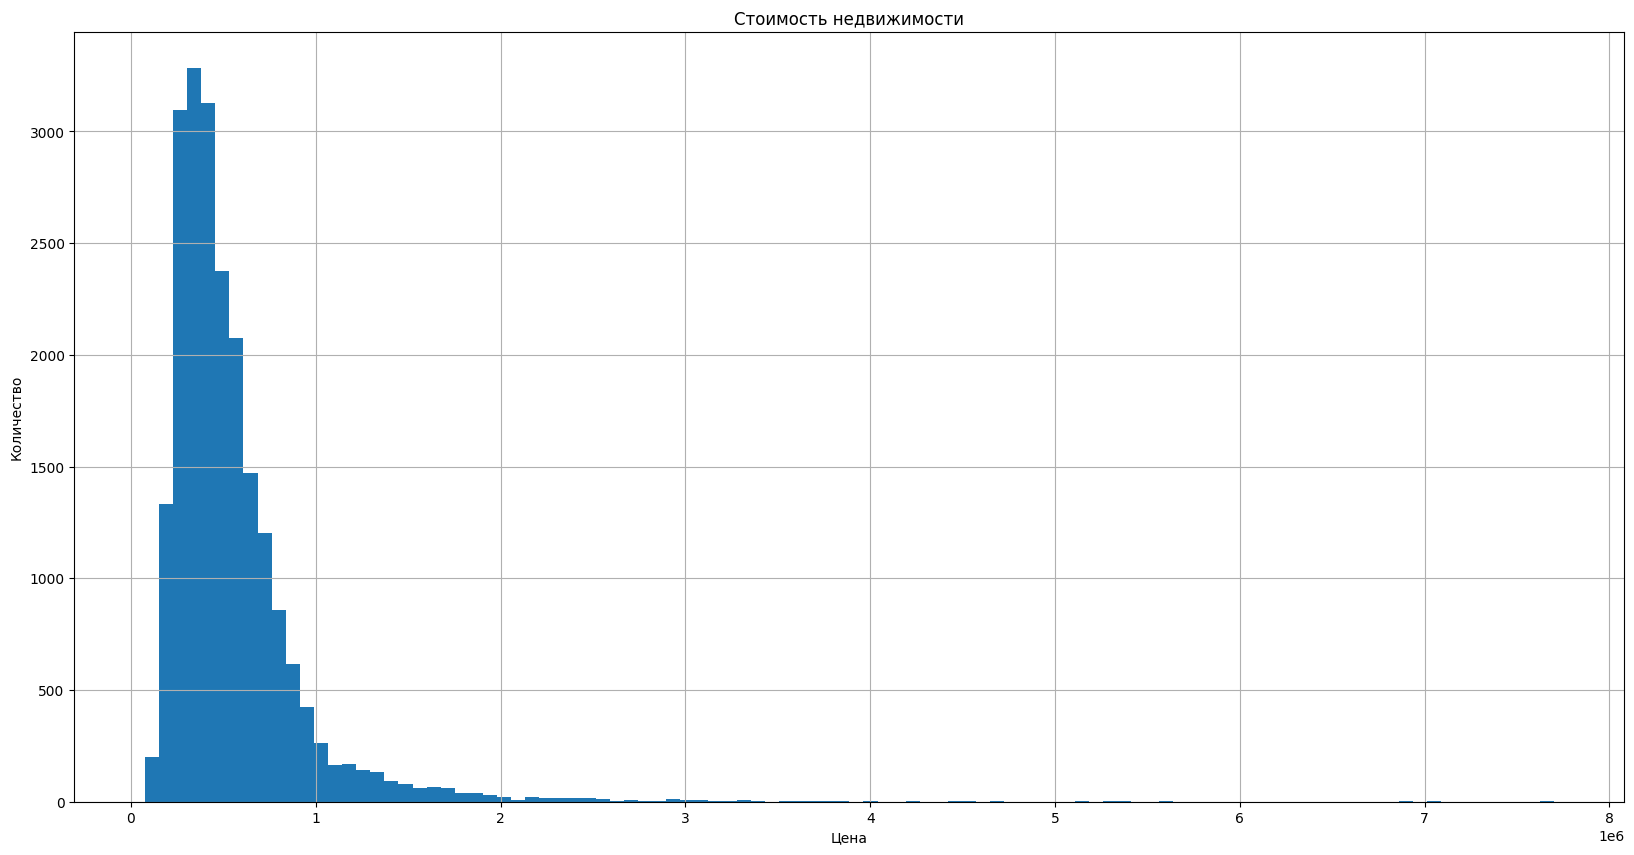

In [4]:
plt.figure(figsize=(20, 10))
plt.hist(df['price'], bins=100)
plt.title('Стоимость недвижимости')
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.grid()
;




Вывод:
- Максимальное количество домов находятся в диапазоне стоимости от 250 тыс. до 450 тыс, домов стоимосью выше 2 млн достаточно мало

### 1.3. Изучите распределение квадратуры жилой площади

''

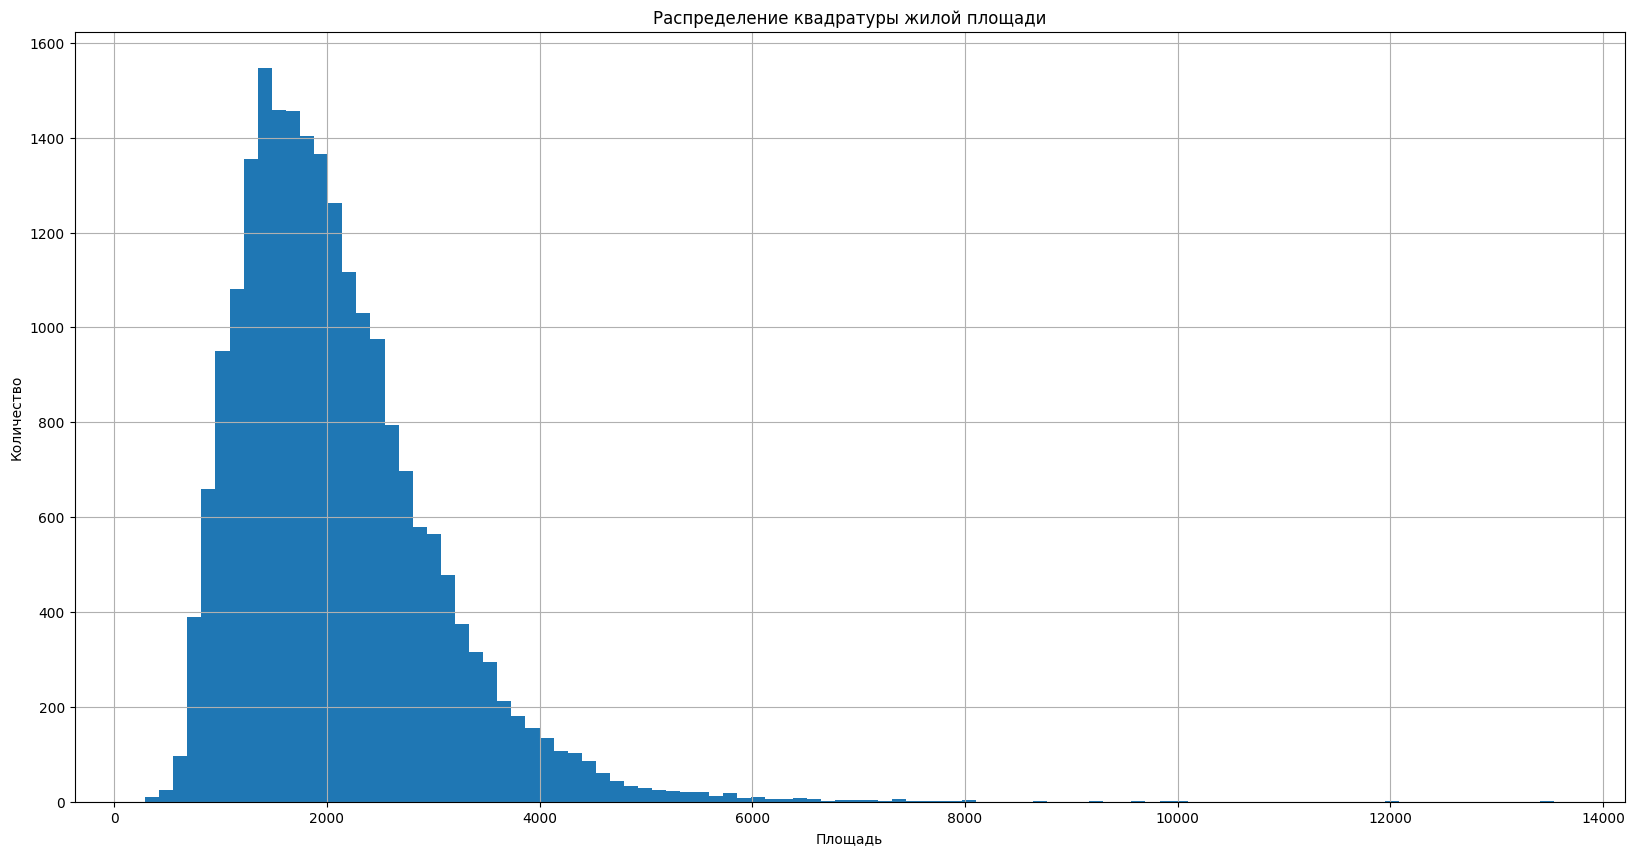

In [5]:

plt.figure(figsize=(20, 10))
plt.hist(df['sqft_living'], bins=100)
plt.title('Распределение квадратуры жилой площади')
plt.ylabel('Количество')
plt.xlabel('Площадь')
plt.grid()
;

Вывод:
- В основном дома строят площадью от 1.3 тыс до 1.9 тыс, дома свыше 6 тыс. строят в малом количестве

### 1.4. Изучите распределение года постройки

''

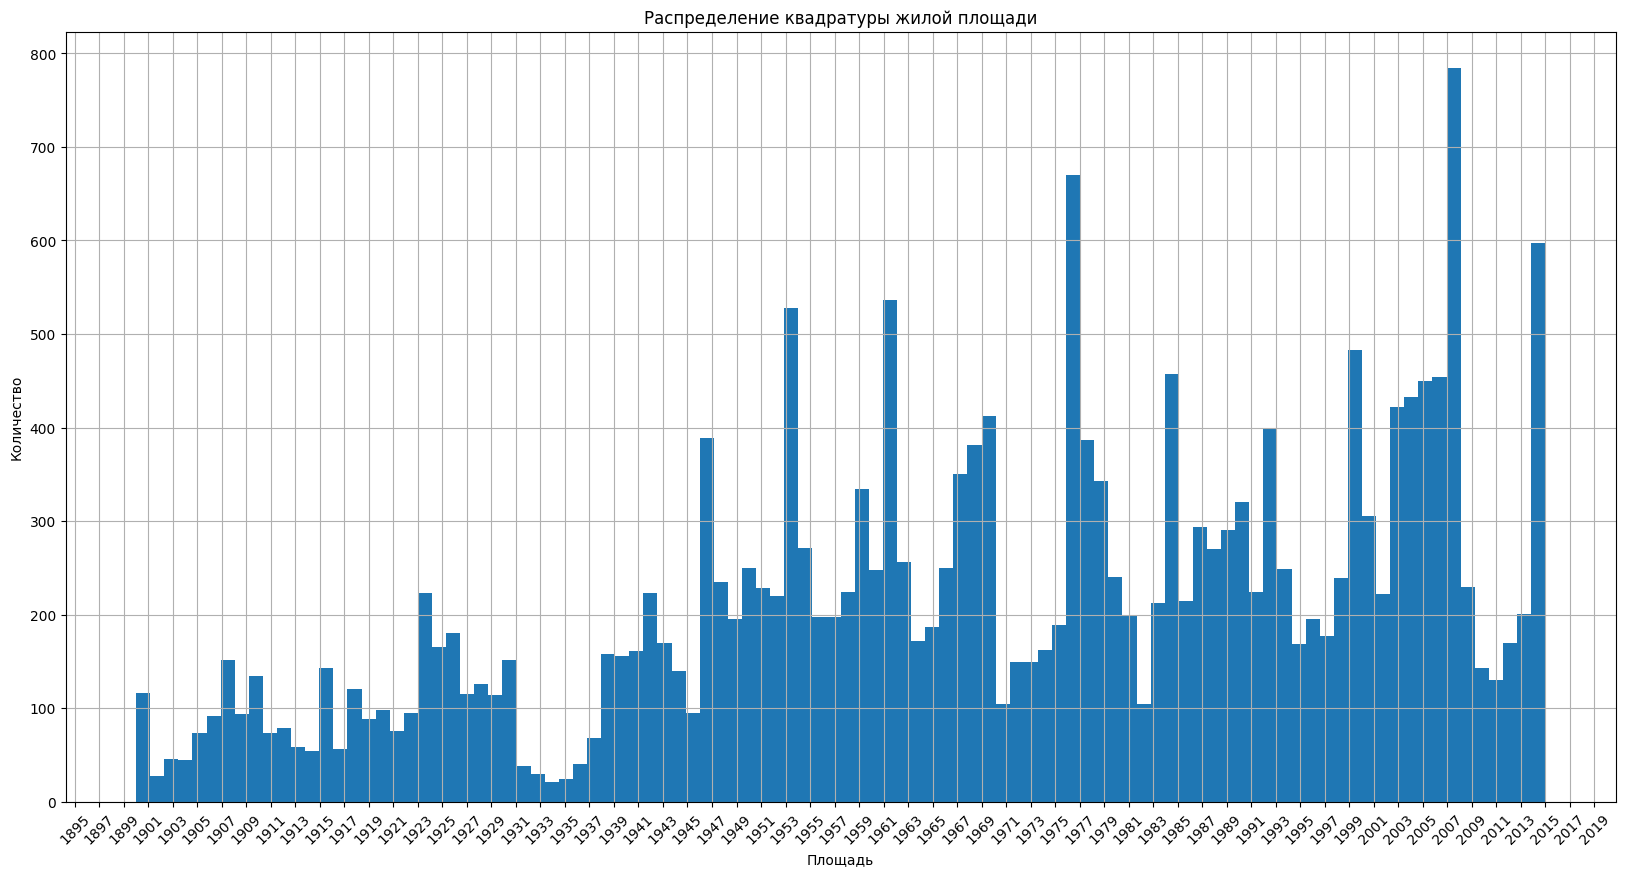

In [44]:
plt.figure(figsize=(20, 10))
plt.hist(df['yr_built'], bins=100)
plt.title('Распределение квадратуры жилой площади')
plt.ylabel('Количество')
plt.xlabel('Площадь')
plt.xticks(np.arange(df['yr_built'].min() - 5, df['yr_built'].max() + 5, 2), rotation=45)
plt.grid()
;

Вывод:
- Меньше всего стоили домов в 1901-1904 и 1933-1936 годах
- Наиболее попуоярные годы для строительства домов: 2014; 2006; 2005

# Условие 2: 2 задача

### 2.1. Изучите распределение домов от наличия вида на набережную

''

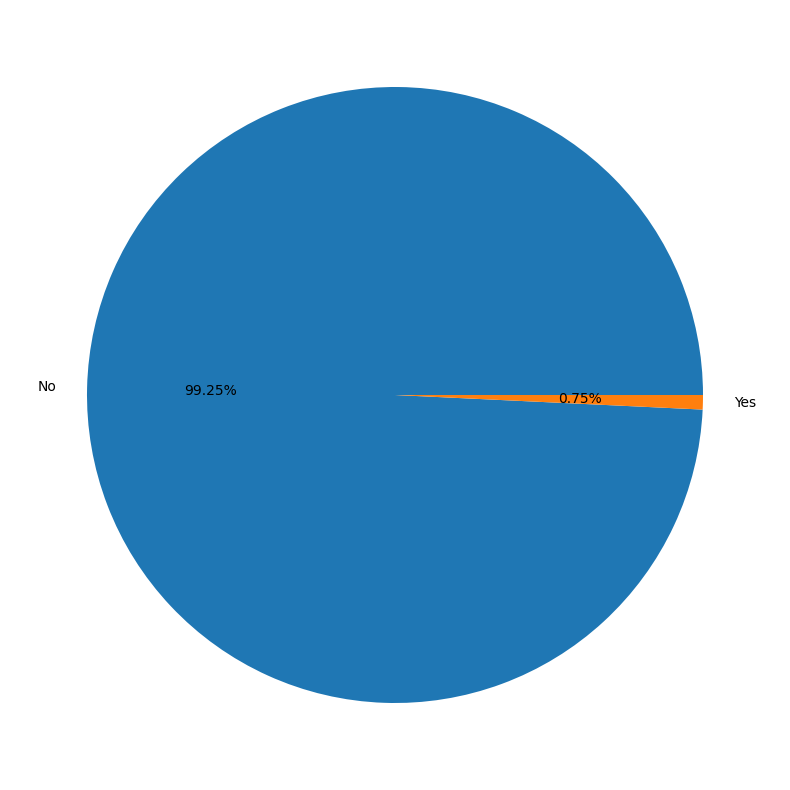

In [7]:
data_2_1 = df['waterfront'].value_counts()
plt.figure(figsize=(20, 10))
plt.pie(data_2_1, labels=list(map(lambda x: ['No', 'Yes'][x], data_2_1.index)), autopct='%.2f%%')
;

Вывод:
- Домов с видом на набережную значительно меньше, всего 0.75%

### 2.2. Изучите распределение этажей домов


''

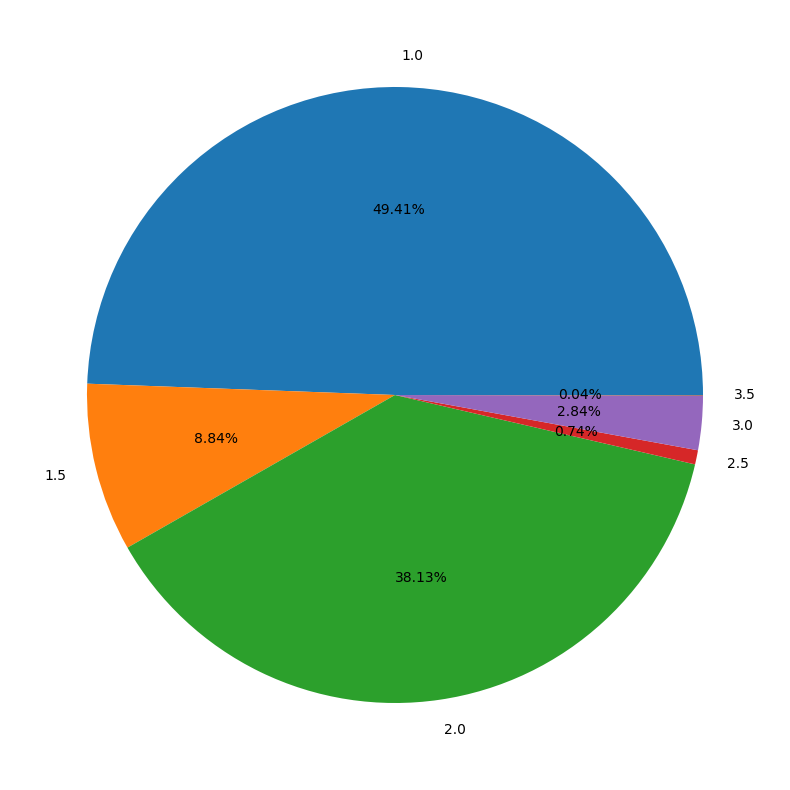

In [8]:
data_2_2 = df['floors'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.pie(data_2_2, labels=data_2_2.index, autopct='%.2f%%')
;

Вывод:
- Наиболее популярая этажность домов: 1(49.41%) и 2(38.13%)
- Наименее популярная этажность домов: 3.5 (0.04%) и 2.5 (0.74%)

### 2.3. Изучите распределение состояния домов

''

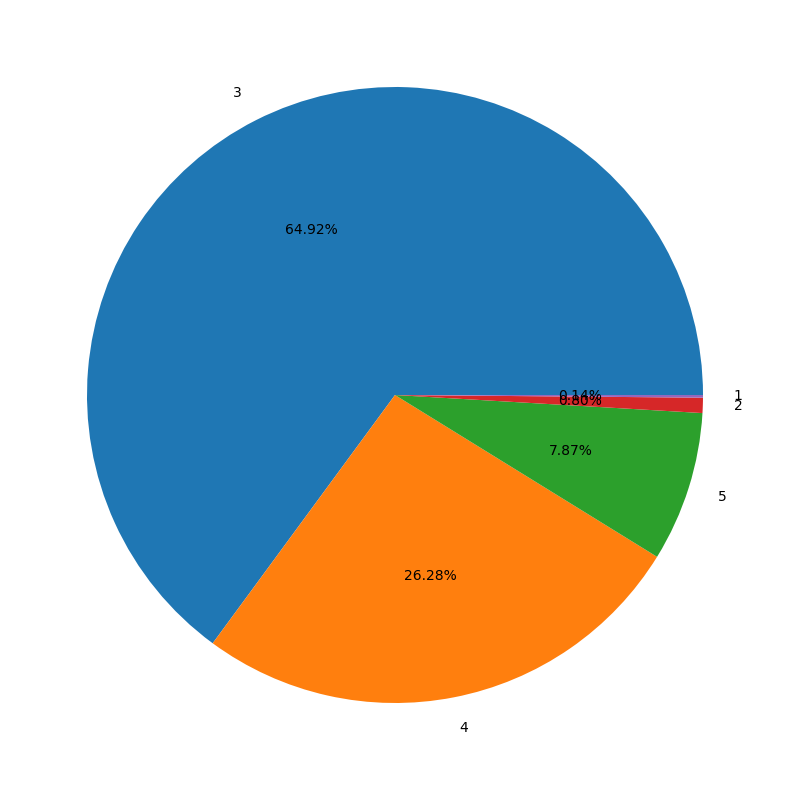

In [9]:
data_2_3 = df['condition'].value_counts()
plt.figure(figsize=(20, 10))
plt.pie(data_2_3, labels=data_2_3.index, autopct='%.2f%%')
;

Вывод:
- Наибольшее количество домов имеют состояние 3 (64.92%)
- Меньше всего домов имеют плохое состояние: 1 (0.14%) и 2 (0.80%)

# Условие 3: 3 задача

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [10]:
data_3 = df.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 'int32', 'int16'])
data_3_corr = data_3.corr().round(2)
data_3_corr[np.abs(data_3_corr) < 0.3] = 0
data_3_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
price,0.0,1.00,0.31,0.53,0.70,0.00,0.00,0.0,0.4,0.00,0.67,0.61,0.32,0.00,0.0,0.00,0.31,0.00,0.59,0.00
bedrooms,0.0,0.31,1.00,0.52,0.58,0.00,0.00,0.0,0.0,0.00,0.36,0.48,0.30,0.00,0.0,0.00,0.00,0.00,0.39,0.00
bathrooms,0.0,0.53,0.52,1.00,0.75,0.00,0.50,0.0,0.0,0.00,0.66,0.69,0.00,0.51,0.0,0.00,0.00,0.00,0.57,0.00
sqft_living,0.0,0.70,0.58,0.75,1.00,0.00,0.35,0.0,0.0,0.00,0.76,0.88,0.44,0.32,0.0,0.00,0.00,0.00,0.76,0.00
sqft_lot,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.72
floors,0.0,0.00,0.00,0.50,0.35,0.00,1.00,0.0,0.0,0.00,0.46,0.52,0.00,0.49,0.0,0.00,0.00,0.00,0.00,0.00
waterfront,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.4,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
view,0.0,0.40,0.00,0.00,0.00,0.00,0.00,0.4,1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
condition,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.00,-0.36,0.0,0.00,0.00,0.00,0.00,0.00


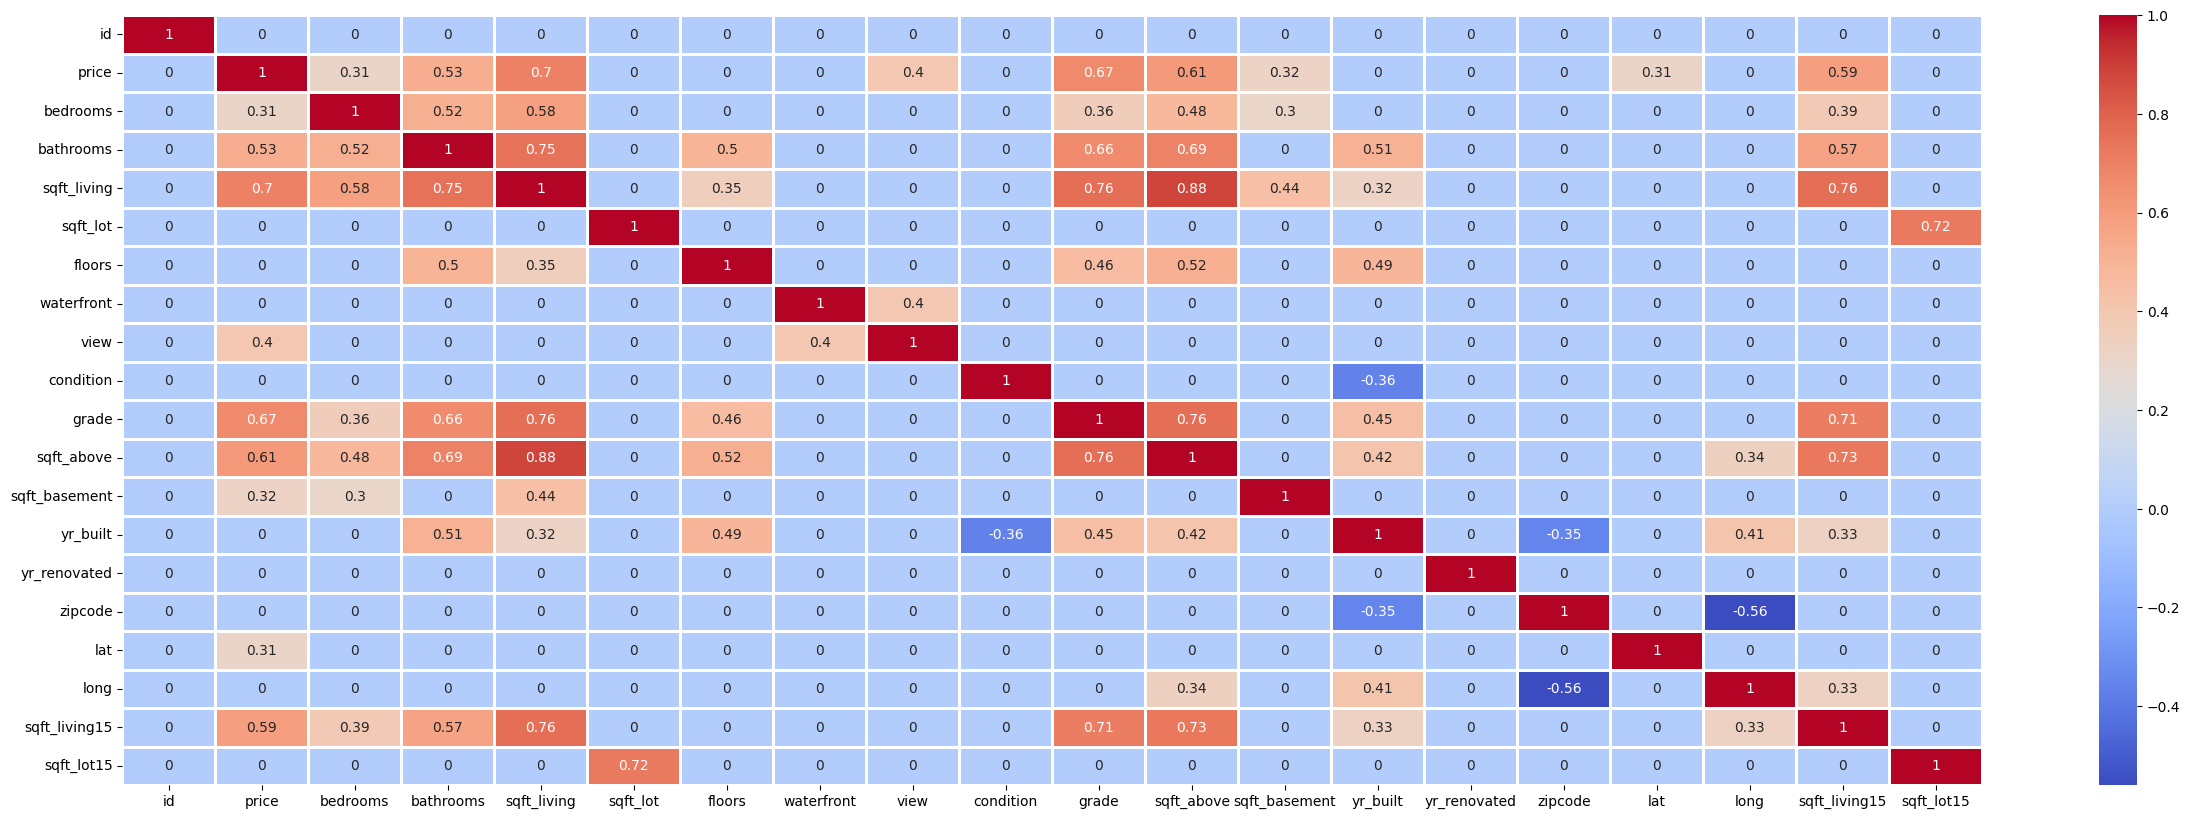

In [11]:
plt.figure(figsize=(30, 10))
sns.heatmap(data_3_corr, annot=True, cmap='coolwarm', linewidth=1);


Вывод
- Сильную связь имеют параметры:
  - жилая площадь - площадь выше земли
  - цена - жилая площадь
  - количество ванных комнат - жилая площадь
  - жилая площадь - оценка
  - жилая площадь - жилая площадь у 15 соседей
  - общая площадь - общая площадь у 15 соседей
  - оценка - площадь выше земли
  - оценка - жилая площадь у 15 соседей
  - площадь выше земли - жилая площадь у 15 соседей

остальные параметры имеют среднюю и слабую связь

''

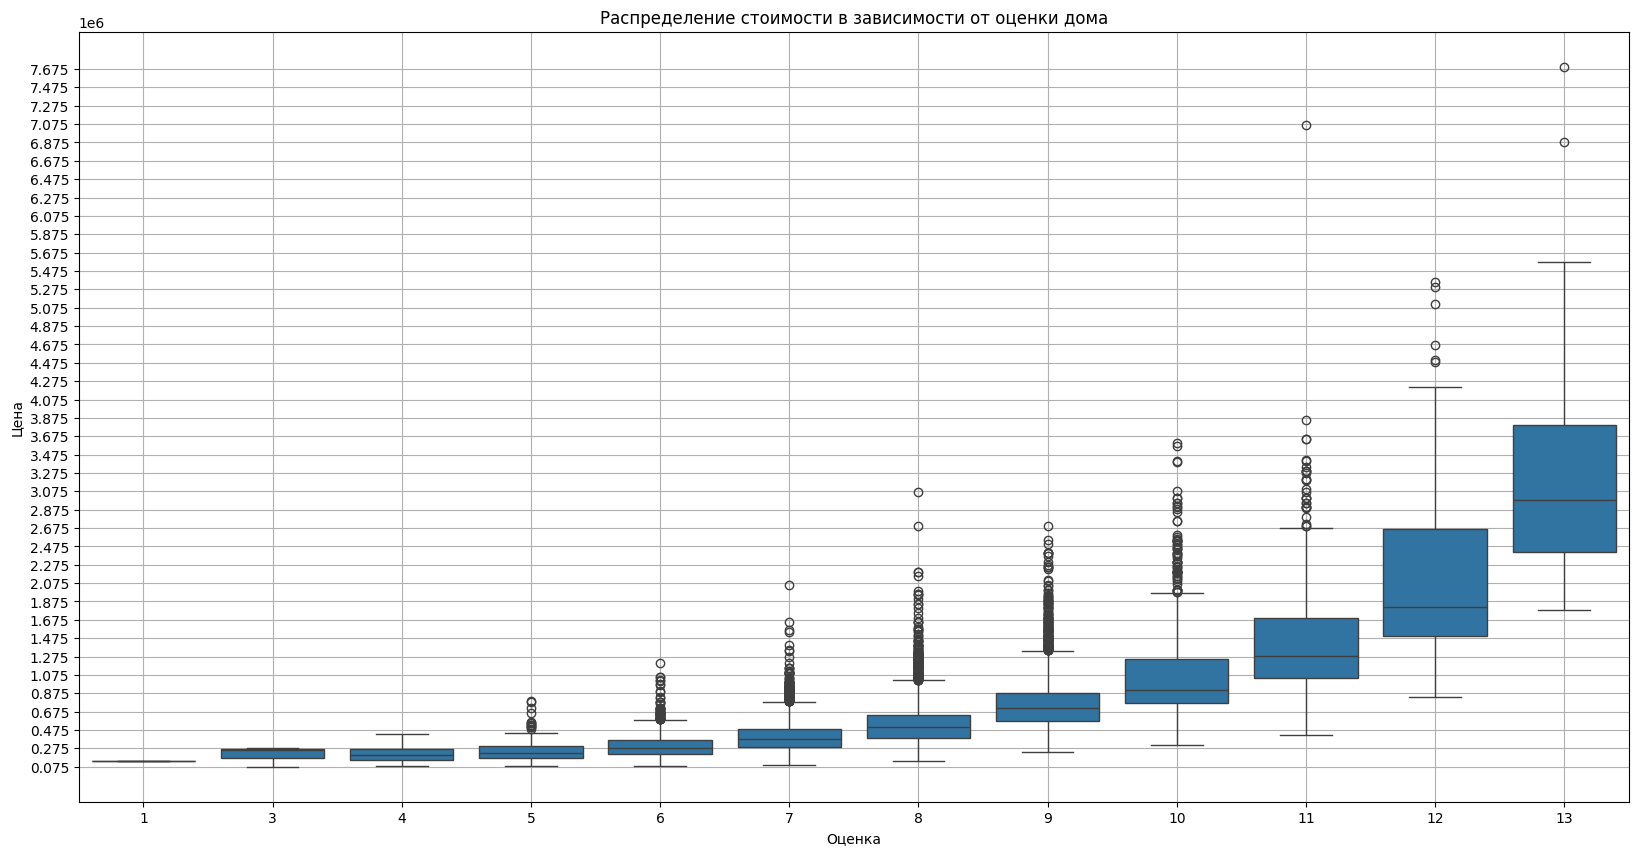

In [12]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['grade'], y=df['price'])
plt.xlabel('Оценка')
plt.ylabel('Цена')
plt.title('Распределение стоимости в зависимости от оценки дома')
plt.yticks(np.arange(df['price'].min(), df['price'].max(), 200000))
plt.grid()
;

Вывод:

- У домов с оценкой 11 и 13 наблюдаются наибольшее выбросы
    
- С увеличением оценки растет медианная стоимость домов
    
- Самый дорогой дом имеет оценку 13

<Figure size 2000x1000 with 0 Axes>

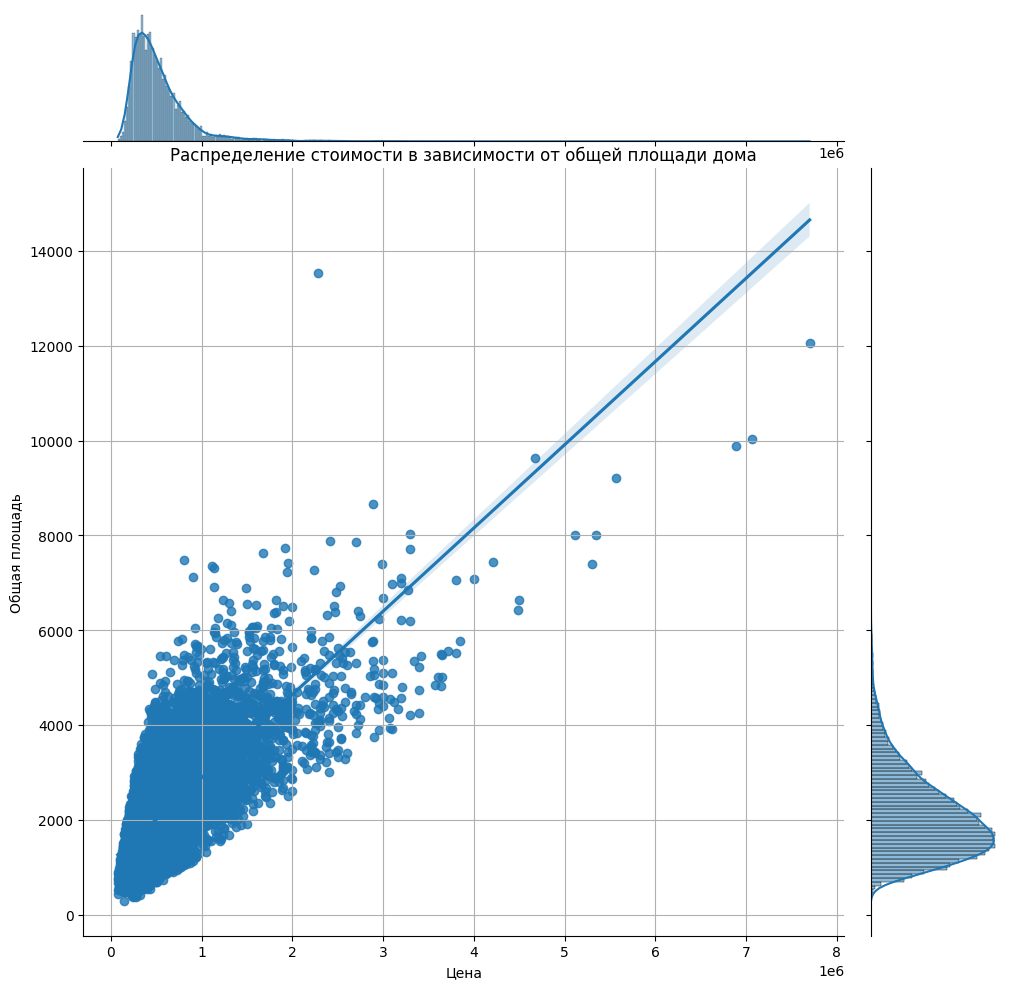

In [33]:
plt.figure(figsize=(20, 10))
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg', height=10);
plt.xlabel('Цена')
plt.ylabel('Жилая площадь')
plt.title('Распределение стоимости в зависимости от жилой площади дома')
plt.grid()

Вывод:
- Видно, что тренд возрастающий, т.е. по мере увеличения площади растет и цена

<Figure size 2000x1000 with 0 Axes>

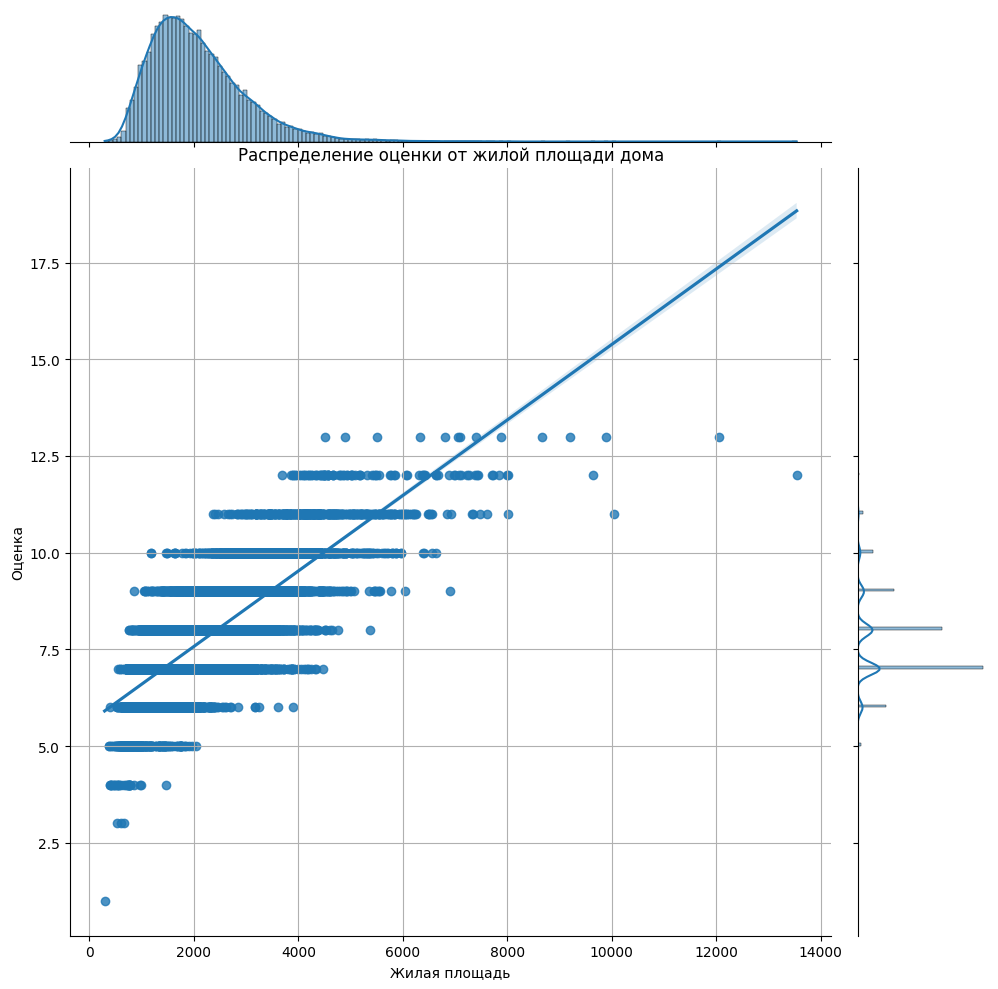

In [35]:
plt.figure(figsize=(20, 10))
sns.jointplot(y=df['grade'], x=df['sqft_living'], kind='reg', height=10);
plt.ylabel('Оценка')
plt.xlabel('Жилая площадь')
plt.title('Распределение оценки от жилой площади дома')
plt.grid();

Вывод:
- Видно, что тренд возрастающий, т.е. по мере увеличения жилой площади растет и оценка дома

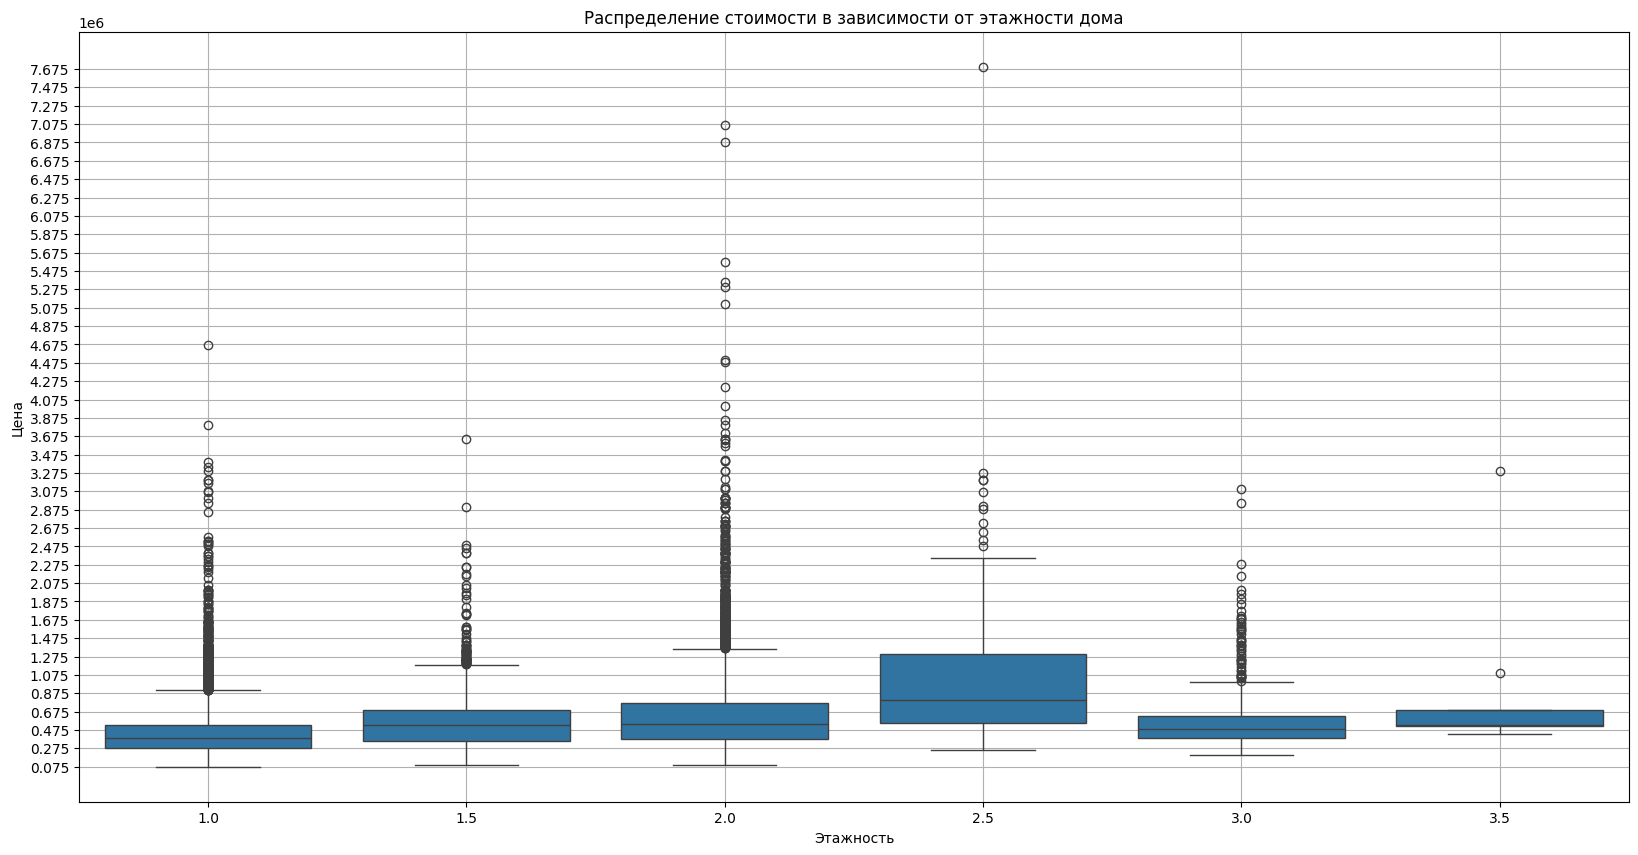

In [27]:
plt.figure(figsize = (20,10))
sns.boxplot(y = df['price'], x = df['floors'])
plt.ylabel('Цена')
plt.xlabel('Этажность')
plt.title('Распределение стоимости в зависимости от этажности дома')
plt.yticks(np.arange(df['price'].min(), df['price'].max(), 200000))
plt.grid();

Вывод:
- Наибольшую медианную стоимость имеют дома этажности 2.5
- Самый дорогой дом 2.5 этажа
- Самая низкая медианная стоимость у одноэтажных домов

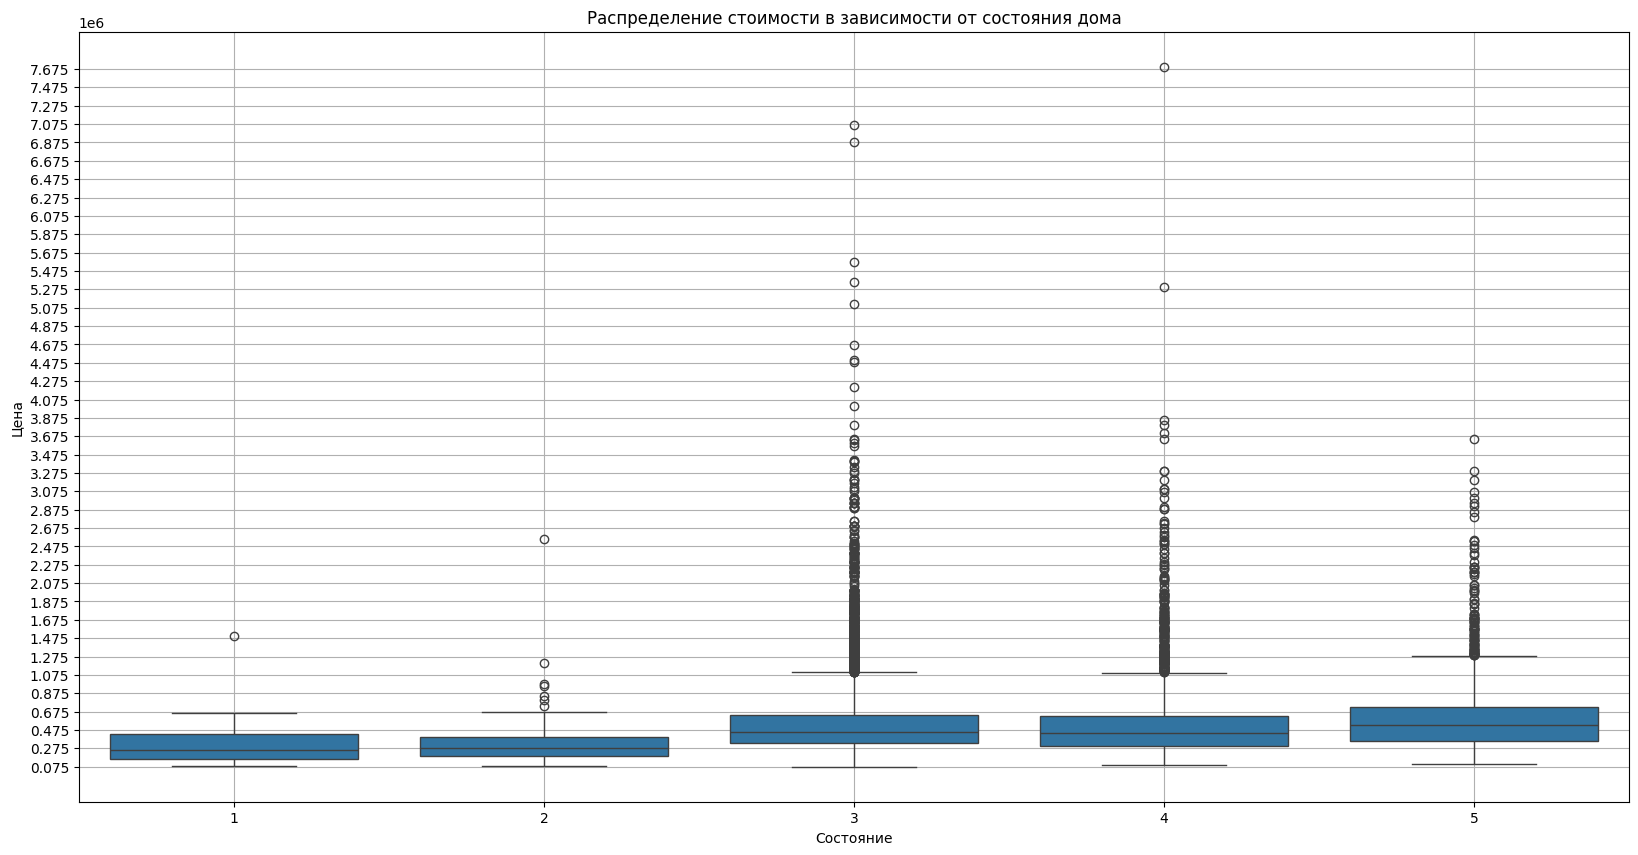

In [28]:
plt.figure(figsize = (20,10))
sns.boxplot(y = df['price'], x = df['condition'])
plt.ylabel('Цена')
plt.xlabel('Состояние')
plt.title('Распределение стоимости в зависимости от состояния дома')
plt.yticks(np.arange(df['price'].min(), df['price'].max(), 200000))
plt.grid();


Вывод:
- Наибольшую медианную стоимость имеют дома с наилучшим состоянием
- Самый дорогой дом имеет состояние 4
- Самая низкая медианная стоимость у домов с состоянием 1